#  Introduction à l'apprentissage ensembliste

On va introduire dans ce notebook l'apprentissage ensembliste (**ensemble learning**). 


Pour répondre aux questions de veille de la première partie, nous vous proposons d'utiliser un article du site de publication **Medium** disponible à cette adresse : https://medium.com/swlh/intro-to-ensemble-models-65930fd4f986 


Nous allons dans une seconde partie mettre en pratique les algorithmes ensemblistes: *Bagging,AdaBoost et Random Forest* sur le dataset **PIMA INDIAN DIABETES**. 


Les données disponibles sont les suivantes :

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure  = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age  = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)



### 0. Questions de veille 

1. Définir le principe général de l'ensemble learning
2. Expliquer le graphique suivant

<div>
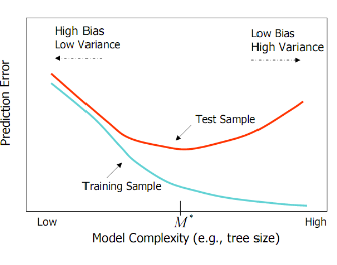
</div>

3. Citer les grandes familles de méthodes de l'ensemble learning
4. Définir le bagging. Citer un exemple d'algorithme de bagging
5. Définir le boosting.Citer un exemple d'algorithme de boosting
6. Définir le stacking


### 1. Import des libraries utiles

In [1]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 2. Description du dataset
1. Charger le dataset et afficher sa dimension

2. Afficher les 10 premières lignes de la table

3. Afficher la liste des variables et leurs types


In [11]:
diabetes_df=pd.read_csv('diabetes.csv', sep=',', encoding='utf8')

In [3]:
diabetes_df= pd.read_csv('diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 ### 3. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable


In [5]:
#il n'a pas de valeurs  manquante

 ### 4. Analyse exploratoire 
 
 1. Afficher le `distplot`de la variable `Glucose`. Commenter
 2. Afficher le `distplot` de la variable `DiabetesPedigreeFunction`. Commenter
 3. Afficher le `Boxplot`de la variable `Insulin`en fonction de la variable cible `Outcome`
 4. Afficher les `Boxplot` des variables `BMI` et `Age` en fonction de la variable cible `Outcome`
 5. Afficher le `pairplot`de l'ensemble des variables `BloodPressure`et `BMI`en fonction de la variable `Outcome`.Commenter
 6. Afficher la HeatMap des corrélations de l'ensemble des variables (hors variable cible). Commenter
 
 **Bonus:** Afficher le `kdeplot`de l'ensemble des variables en fonction de la variable cible. Commenter
 
 

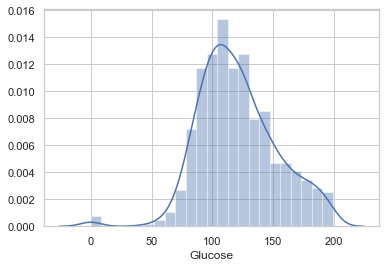

In [6]:
#2Afficher le distplotde la variable Glucose. Commenter
sns.distplot(diabetes_df['Glucose'])


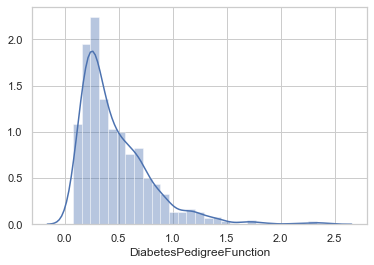

In [7]:
#2Afficher le distplotde la variable Glucose. Commenter
sns.distplot(diabetes_df['DiabetesPedigreeFunction'])

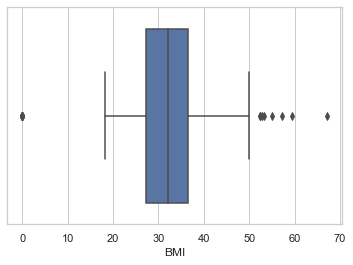

In [8]:
sns.boxplot('BMI',data=diabetes_df,orient='Outcome')

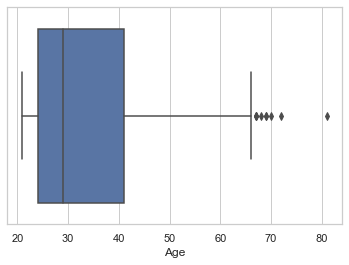

In [9]:
sns.boxplot('Age',data=diabetes_df,orient='Outcome')

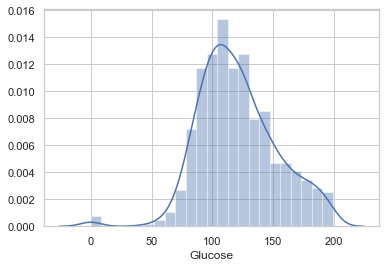

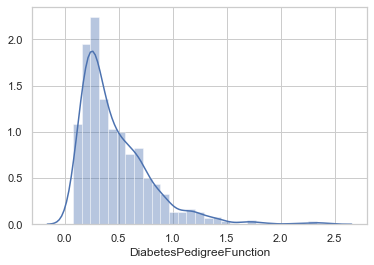

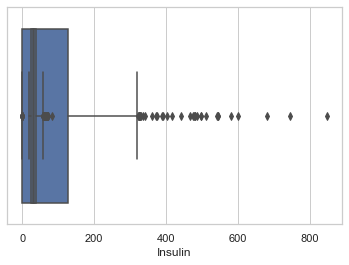

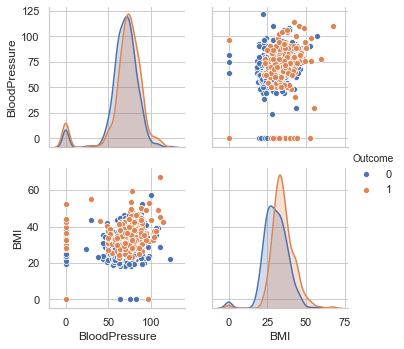

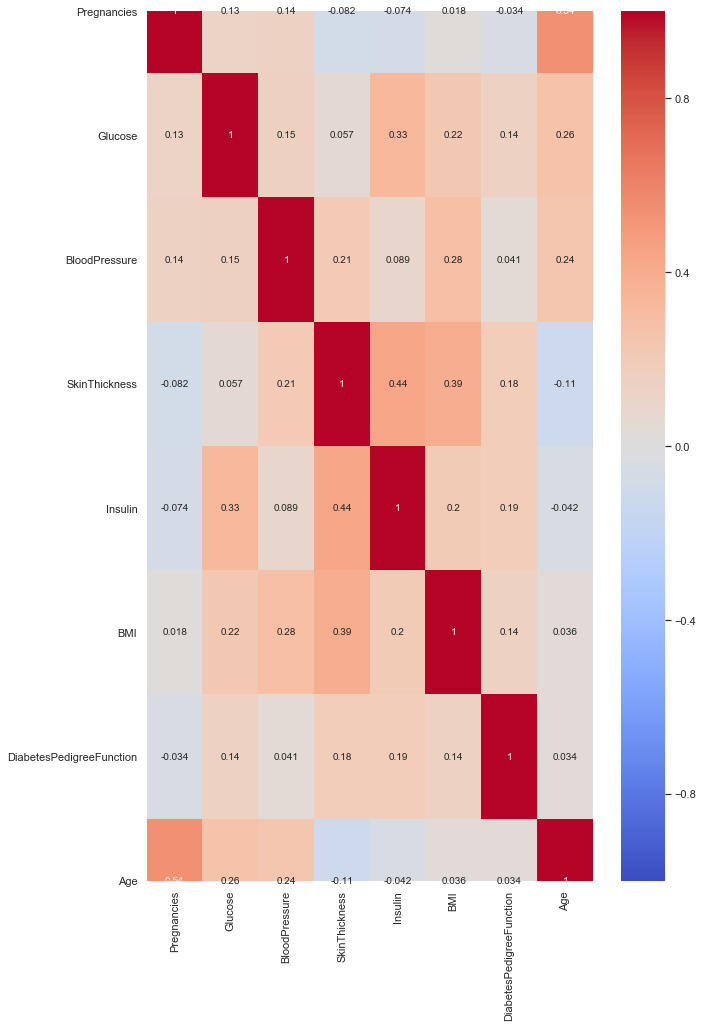

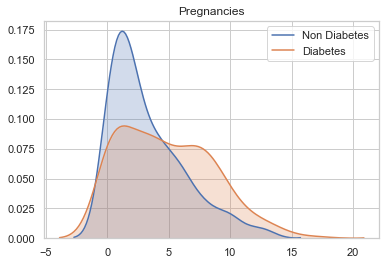

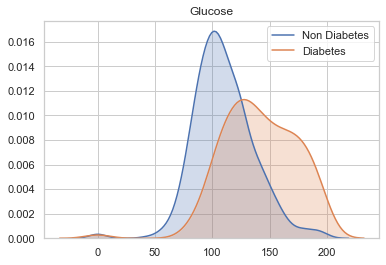

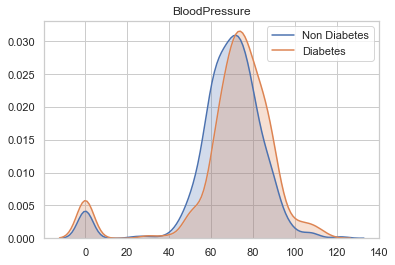

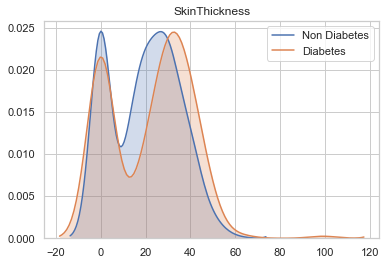

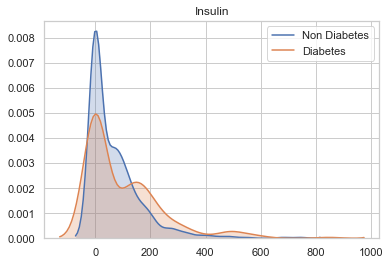

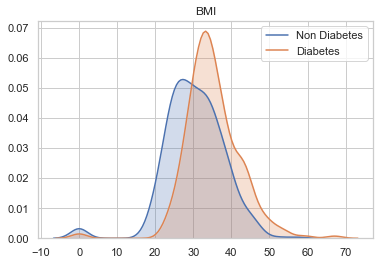

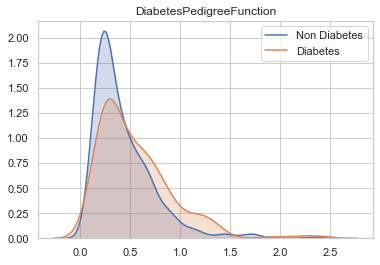

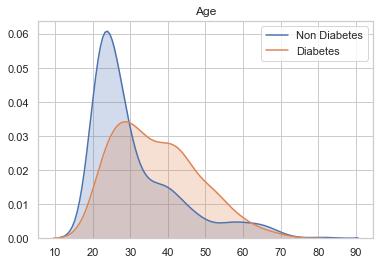

In [28]:
%matplotlib inline
sns.distplot(diabetes_df["Glucose"],kde = True)
plt.show()
sns.distplot(diabetes_df["DiabetesPedigreeFunction"])
plt.show()

sns.boxplot(x = "Insulin",hue = "Outcome",data = diabetes_df)
sns.boxplot(x = ["BMI","Age"],hue = "Outcome",data = diabetes_df)
plt.show()

sns.pairplot(diabetes_df,vars = ["BloodPressure","BMI"], hue="Outcome")
plt.show()

plt.figure(figsize=(10,16))
sns.heatmap(diabetes_df.iloc[:,:-1].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.show()
for col in diabetes_df.iloc[:,:-1].columns:
    sns.kdeplot(diabetes_df.loc[diabetes_df['Outcome']== 0,col], shade=True,label = "Non Diabetes")
    sns.kdeplot(diabetes_df.loc[diabetes_df['Outcome']== 1,col], shade=True,label = "Diabetes")
    plt.title(col)
    plt.show()

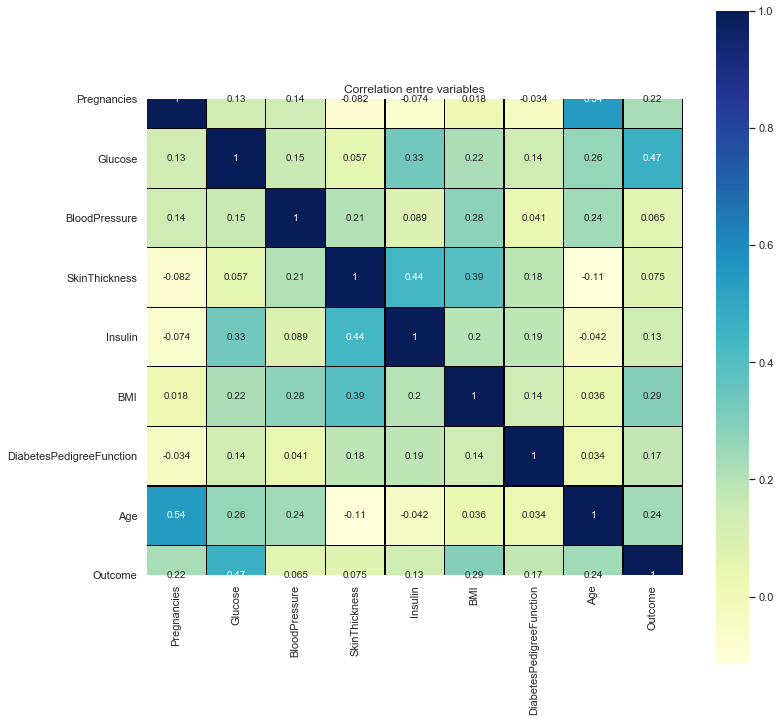

In [13]:
# affichage des corrélations entre variables
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Correlation entre variables')
sns.heatmap(diabetes_df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

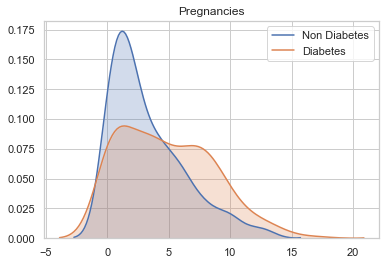

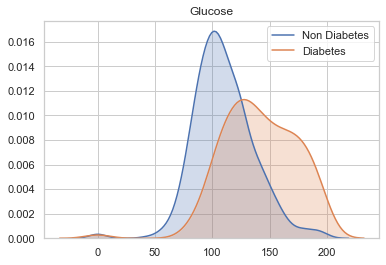

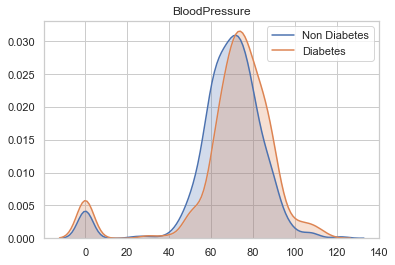

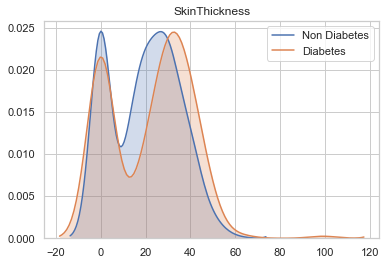

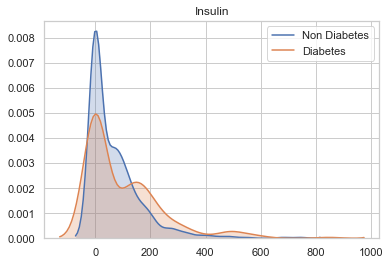

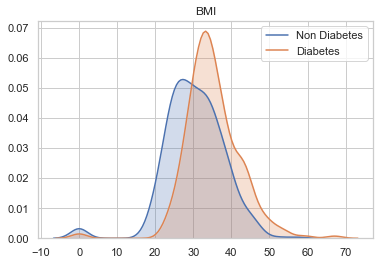

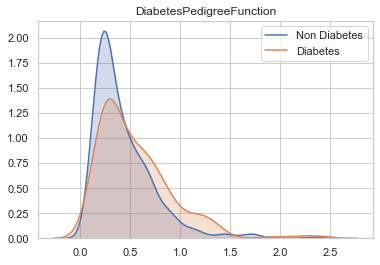

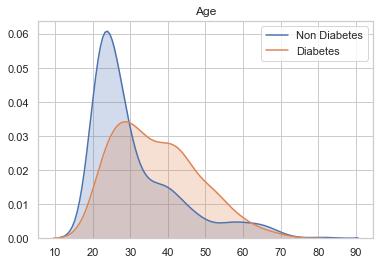

In [14]:
for col in diabetes_df.iloc[:,:-1].columns:
    sns.kdeplot(diabetes_df.loc[diabetes_df['Outcome']== 0,col], shade=True,label = "Non Diabetes")
    sns.kdeplot(diabetes_df.loc[diabetes_df['Outcome']== 1,col], shade=True,label = "Diabetes")
    plt.title(col)
    plt.show()

 ### 5. Data splitting
 
 1. Créer un DataFrame `X` contenant les features et `y` la Target
 2. Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.33 et random_state à 42 et stratify = y 

3. Àfficher le tableau de fréquence de la variable `y` (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 

In [17]:
X = diabetes_df.iloc[:,0:8]
y = diabetes_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 42,stratify = y)
print(y_train.value_counts()/y_train.count())
print(y_test.value_counts()/y_test.count())


0    0.651751
1    0.348249
Name: Outcome, dtype: float64
0    0.649606
1    0.350394
Name: Outcome, dtype: float64


 ### 6. Bagging - Modélisation et Performances

Nous allons à ce stade entraîner un **modèle Bagging** en utilisant la fonction `sklearn.ensemble.BaggingClassifier`

1. Afficher la DocString de cette fonction

2. On paramètre la fonction avec  `tree.DecisionTreeClassifier(random_state=1)`. Quelle est sa signification?

3. Instancier un `BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test.

5. Afficher la `heatmap` de la matrice de confusion (fonction `sklearn.metrics.confusion_matrix`) et l'Accuracy. Commenter

6. Définir l'AUC et l'afficher
   
7. Définir la courbe ROC
   Afficher la courbe ROC. Interpréter

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.BaggingClassifier 
#print(DecisionTreeClassifier.__doc__)

In [ ]:
# c 'est  bagging  d'arbre

In [22]:
clf = DecisionTreeClassifier(max_depth = 1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[[144  21]
 [ 47  42]]
Accuracy: 0.7322834645669292
Precision: 0.6666666666666666
Recall: 0.47191011235955055


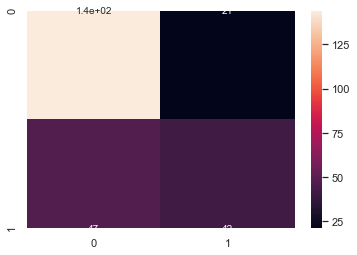

In [20]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#0.7322834645669292

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)


y_pred_proba = clf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred)


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


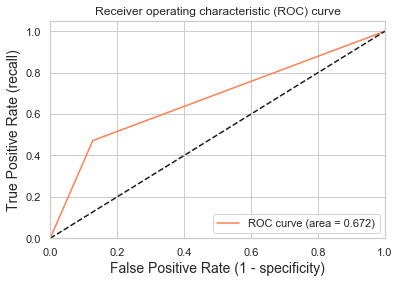

In [21]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
y_pred = model.predict(X_test)
 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)
 
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
 
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
 
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

NameError: name 'predict' is not defined

 ### 7. AdaBoost - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle AdaBoost** en utilisant la fonction `sklearn.ensemble.AdaBoostClassifier`

1. Afficher la DocString de cette fonction
2. Instancier un `AdaBoostClassifier(random_state=1)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

3. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

4. Afficher l'Accuracy, l'AUC et la courbe ROC

In [34]:
from sklearn.ensemble import RandomForestClassifier

 ### 8. Random Forest - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle RANDOM FOREST** en utilisant la fonction `sklearn.ensemble.RandomForestClassifier`

1. Afficher la DocString de cette fonction
2. On choisit n_estimators=1000. Quelle est sa signification?
3. Instancier un `RandomForestClassifier(n_estimators=1000)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

5. Afficher l'Accuracy, l'AUC et la courbe ROC

6. Afficher l'importance de chaque variable dans le RF avec `rf.feature_importances_`. Associer à chaque niveau le nom de la variable associée (dans l'ordre des variables disponibles dans le dataset).
   Afficher le `barplot` de l'importance par variable. Commenter
   
**Bonus** : Exclure les 2 variables les moins importantes (`SkinThickness`et `Insulin`) et relancer le modèle. Comparer l'AUC à celui du modèle incluant l'ensemble des variables

**Bonus**: Rechercher les hyperparamètres optimaux de la RF par GridSearch puis relancer le modèle RF et calculer l'AUC. Commenter les résultats par comparaison avec les précédents modèles

```
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
```

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

rf.score(X_train, y_train)

1.0

In [25]:
y_pred = rf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(rf.feature_importances_)

Accuracy: 0.7559055118110236
[0.09374736 0.25986543 0.08949115 0.07084433 0.07474128 0.16307541
 0.12203557 0.12619948]


In [26]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Glucose                     0.259865
BMI                         0.163075
Age                         0.126199
DiabetesPedigreeFunction    0.122036
Pregnancies                 0.093747
BloodPressure               0.089491
Insulin                     0.074741
SkinThickness               0.070844
dtype: float64

No handles with labels found to put in legend.


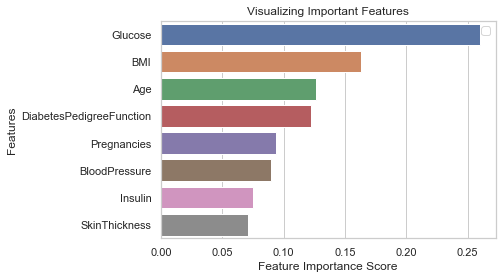

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


 ### 9. Comparaison des performances
 1. Regrouper dans un DataFrame les Accuracy et AUC par modèle (créer au préalable un Dictionnaire)
 2. Superposer les courbes ROC. Commenter les résultats